**Tech Challeng Fase I**

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

**1) Exploração de dados: Carregue a base de dados e explore suas características.**
Carregue a base de dados e explore suas características.
Analise estatísticas descritivas e visualize distribuições relevantes.

**2) Pré-processamento de dados:**
Realize a limpeza dos dados, tratando valores ausentes (se necessário).
Converta variáveis categóricas em formatos adequados para modelagem.

**3) Modelagem**
Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
Divida o conjunto de dados em conjuntos de treinamento e teste.

**4) Treinamento e avaliação do modelo**
Treine o modelo com o conjunto de treinamento.

**5) Validação estatística:**
Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).
*O que avaliaremos:*
Apresente resultados visuais, como gráficos de previsões vs. valores reais.
Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.
Observações: Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.

*Entregável*
Como entregável, o grupo deve enviar um vídeo junto com o link do github do projeto e o código desenvolvido, apresentando o passo a passo do que foi utilizado como a fonte de dados e como os modelos foram criados.

O vídeo deve estar em uma plataforma como Youtube.

Configuração - Importar módulos

In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

Importando os dados do Excel

In [3]:
# Nome do arquivo Excel e da planilha
arquivo_excel = 'encargos_saude.xlsx'
nome_planilha = 'encargos_saude'

# Ler o arquivo Excel
dataset = pd.read_excel(arquivo_excel, sheet_name=nome_planilha)



Conhecendo melhor os dados

In [4]:
dataset.head()

,Idade,Sexo,IMC,Filhos,Fumante,Comorbidade,Sedentarismo,Encargos
0,65,female,24.16,4,no,0,1,39000.0
1,67,female,19.84,4,no,0,1,39000.0
2,22,male,31.76,1,no,1,1,43680.0
3,24,male,30.79,4,no,0,0,24000.0
4,64,female,19.52,3,no,0,1,39000.0


In [5]:
dataset.shape

(5000, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         5000 non-null   int64  
 1   Sexo          5000 non-null   object 
 2   IMC           5000 non-null   float64
 3   Filhos        5000 non-null   int64  
 4   Fumante       5000 non-null   object 
 5   Comorbidade   5000 non-null   int64  
 6   Sedentarismo  5000 non-null   int64  
 7   Encargos      5000 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


Como temos algumas variaveis do tipo object. Vamos analisar quantas categorias existem para cada tipo e os valoes correspondentes com o a função value_counts()

In [7]:
set(dataset["Fumante"])

{'no', 'yes'}

In [8]:
set(dataset["Sexo"])

{'female', 'male'}

In [9]:
dataset["Sexo"].value_counts()

,count
Sexo,
female,2544
male,2456


In [10]:
dataset["Fumante"].value_counts()

,count
Fumante,
no,3534
yes,1466


Agora vamos analisar os dados do tipo numérico com a função describe():

In [11]:
dataset.describe()

,Idade,IMC,Filhos,Comorbidade,Sedentarismo,Encargos
count,5000.00000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000
mean,50.38740,29.111842,3.038200,0.2902,0.396000,45138.645200
std,17.96779,7.523877,1.991264,0.4539,0.489113,20356.236853
min,18.00000,18.510000,0.000000,0.0000,0.000000,16000.000000
25%,34.00000,23.130000,1.000000,0.0000,0.000000,30000.000000
50%,54.00000,27.950000,3.000000,0.0000,0.000000,40320.000000
75%,67.00000,33.432500,5.000000,1.0000,1.000000,54600.000000
max,74.00000,49.980000,6.000000,1.0000,1.000000,163800.000000


Agora vamos verificar os tipos de dados (data types) de cada coluna.

In [12]:
dataset.dtypes

,0
Idade,int64
Sexo,object
IMC,float64
Filhos,int64
Fumante,object
Comorbidade,int64
Sedentarismo,int64
Encargos,float64


Vamos conferir se existe algum valor nulo na tabela

In [13]:
dataset.isnull().sum()

,0
Idade,0
Sexo,0
IMC,0
Filhos,0
Fumante,0
Comorbidade,0
Sedentarismo,0
Encargos,0


Agora analisando algumas distribuições com histogramas:

array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'IMC'}>],
       [<Axes: title={'center': 'Filhos'}>,
        <Axes: title={'center': 'Comorbidade'}>],
       [<Axes: title={'center': 'Sedentarismo'}>,
        <Axes: title={'center': 'Encargos'}>]], dtype=object)

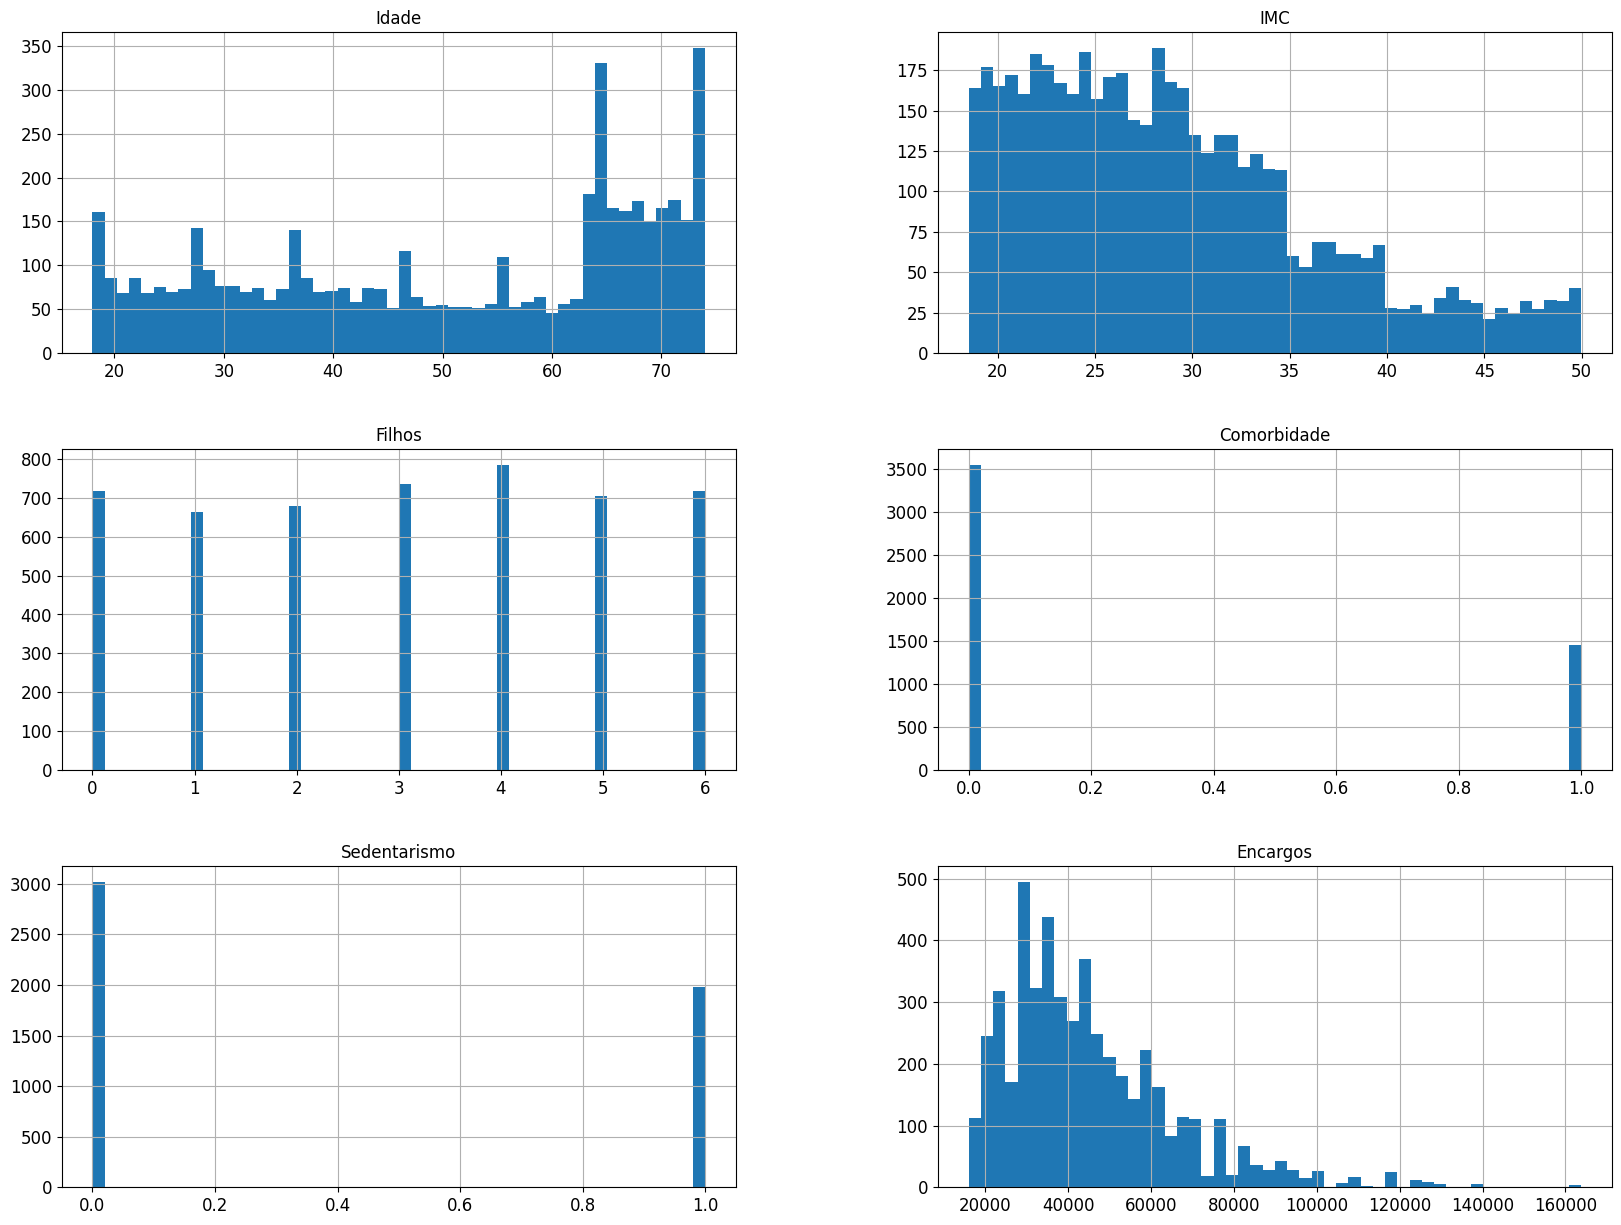

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

Separando as bases em treino e teste

In [15]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 7)

In [16]:
print(len(df_train), "treinamento +", len(df_test), "teste")

4000 treinamento + 1000 teste


Criando categorias de idade. Quando dividimos o conjunto de treino e teste precisamos garantir que ambos sejam representativos com todos os valores de idade.

<Axes: >

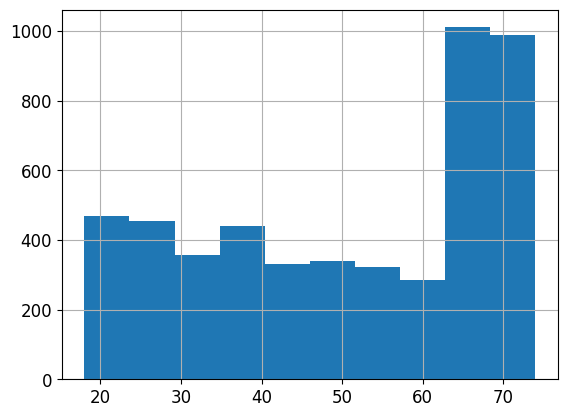

In [17]:
dataset["Idade"].hist()

In [18]:

dataset["idade_cat"] = np.ceil(dataset["Idade"] / 1.5) # ceil para arredondar valores para cima


dataset["idade_cat"].where(dataset["idade_cat"] < 60, 60.0, inplace=True)

In [19]:
#cut do Pandas, que é comumente usada para dividir um conjunto de dados em intervalos discretos chamados de "bins" (intervalos ou faixas)
dataset["idade_cat"] = pd.cut(dataset["Idade"],
                               bins=[0., 20, 40, 55, 70., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [20]:
dataset["idade_cat"].value_counts()

,count
idade_cat,
4,1726
2,1475
3,879
5,674
1,246


<Axes: >

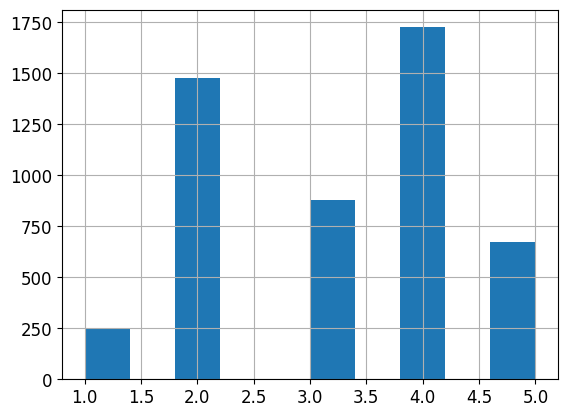

In [21]:
dataset["idade_cat"].hist()

Resumindo, esse código está transformando valores contínuos de idade em categorias discretas, dividindo-os em intervalos específicos e arredondando-os para cima, garantindo que o número de categorias seja limitado e, finalmente, atribuindo rótulos numéricos a essas categorias.

Agora com as categorias criadas, vamos realizar a amostragem estratificada com base na categoria de idade!

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["idade_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [23]:
# Analisando as proporções
strat_test_set["idade_cat"].value_counts() / len(strat_test_set)

,count
idade_cat,
4,0.345
2,0.295
3,0.176
5,0.135
1,0.049


In [24]:
# Analisando as proporções
strat_train_set["idade_cat"].value_counts() / len(strat_train_set)

,count
idade_cat,
4,0.34525
2,0.29500
3,0.17575
5,0.13475
1,0.04925


In [25]:
dataset["idade_cat"].value_counts() / len(dataset)

,count
idade_cat,
4,0.3452
2,0.2950
3,0.1758
5,0.1348
1,0.0492


Depois de garantir que os valores médios de renda anual estão distribuídos de forma estratificada, podemos remover a coluna idade_cat que utilizamos como variável auxiliar.

In [26]:
# Removendo o idade_cat das bases de treino e teste
# O uso do termo set_ é uma convenção para indicar que é uma variável temporária que itera sobre um conjunto de dados (um conjunto de treinamento ou um conjunto de teste).

for set_ in (strat_train_set, strat_test_set):
    set_.drop("idade_cat", axis=1, inplace=True)

Preparando os dados para colocar no algoritmo

In [27]:
medical = strat_train_set.drop("Encargos", axis=1) # apagando a target para a base de treino (nosso x)
medical_labels = strat_train_set["Encargos"].copy() #armazenando a target (nosso y)

In [28]:
# listando as colunas nulas

sample_incomplete_rows = medical[medical.isnull().any(axis=1)].head()
sample_incomplete_rows

,Idade,Sexo,IMC,Filhos,Fumante,Comorbidade,Sedentarismo


Agora vamos pré-processar o recurso de entrada categórica, Sexo e Fumante

In [29]:
medical_cat_sexo = medical[['Sexo']]
medical_cat_sexo.head(10)

,Sexo
1162,male
1114,female
4445,male
4721,male
391,male
3197,female
4867,male
3096,female
3623,male
4515,female


In [30]:
medical_cat_fumante = medical[['Fumante']]
medical_cat_fumante.head(10)

,Fumante
1162,no
1114,no
4445,yes
4721,no
391,yes
3197,no
4867,no
3096,yes
3623,no
4515,yes


In [31]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

O OrdinalEncoder é uma classe da biblioteca scikit-learn, usada para transformar variáveis categóricas ordinais em valores numéricos. Variáveis ordinais são aquelas que têm uma ordem ou hierarquia específica, mas as distâncias entre os valores não são necessariamente significativas.

In [32]:
ordinal_encoder = OrdinalEncoder()
medical_cat_encoded = ordinal_encoder.fit_transform(medical_cat_sexo)
medical_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [33]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [ ]:
ordinal_encoder = OrdinalEncoder()
medical_cat_encoded = ordinal_encoder.fit_transform(medical_cat_fumante)
medical_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [34]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

Remova o atributo de texto porque a mediana só pode ser calculada em atributos numéricos:

In [35]:
medical_num = medical.drop(['Sexo', 'Fumante'], axis=1)

Criando a pipeline de pré-processamento dos dados

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()), # padronizando as escalas dos dados
    ])

medical_num_tr = num_pipeline.fit_transform(medical_num)
medical_num_tr

array([[ 0.20043421,  0.28096319,  1.48762797, -0.63832557, -0.80506227],
       [-1.58256527,  0.78367229, -0.02112251, -0.63832557,  1.24213994],
       [ 0.59046535,  0.69190793, -0.52403933,  1.56659868,  1.24213994],
       ...,
       [ 1.09193395, -0.89468456,  1.48762797,  1.56659868, -0.80506227],
       [-1.69400273, -0.55023573, -0.02112251, -0.63832557, -0.80506227],
       [-1.638284  ,  0.59615381,  0.48179432, -0.63832557, -0.80506227]])

In [37]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [38]:
from sklearn.compose import ColumnTransformer
try:
    from sklearn.preprocessing import OrdinalEncoder # apenas para gerar um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

num_attribs = list(medical_num)
cat_attribs = ["Sexo", "Fumante"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

medical_prepared = full_pipeline.fit_transform(medical)

In [39]:
medical_prepared

array([[ 0.20043421,  0.28096319,  1.48762797, ...,  1.        ,
         1.        ,  0.        ],
       [-1.58256527,  0.78367229, -0.02112251, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59046535,  0.69190793, -0.52403933, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.09193395, -0.89468456,  1.48762797, ...,  0.        ,
         1.        ,  0.        ],
       [-1.69400273, -0.55023573, -0.02112251, ...,  0.        ,
         1.        ,  0.        ],
       [-1.638284  ,  0.59615381,  0.48179432, ...,  1.        ,
         1.        ,  0.        ]])

In [40]:
medical_prepared.shape

(4000, 9)

In [ ]:
type(medical_prepared)

numpy.ndarray

Perceba que o resultado é uma matriz multidimensional. Precisamos transformá-la em dataframe.

In [41]:
column_names = [
    'Idade', 'Imc', 'Filhos', 'Comobirdade', 'Sedentarismo',
    'male', 'famale', 'no', 'yes']

# Transformar o array em DataFrame
medical_df = pd.DataFrame(data=medical_prepared, columns=column_names)

# Exibir o DataFrame resultante
print(medical_df.shape)

(4000, 9)


In [42]:
medical_df.head()

,Idade,Imc,Filhos,Comobirdade,Sedentarismo,male,famale,no,yes
0,0.200434,0.280963,1.487628,-0.638326,-0.805062,0.0,1.0,1.0,0.0
1,-1.582565,0.783672,-0.021123,-0.638326,1.242140,1.0,0.0,1.0,0.0
2,0.590465,0.691908,-0.524039,1.566599,1.242140,0.0,1.0,0.0,1.0
3,0.924778,0.548277,0.481794,-0.638326,1.242140,0.0,1.0,1.0,0.0
4,1.147653,-0.747064,-1.529873,-0.638326,-0.805062,0.0,1.0,0.0,1.0


Prontinho! Nossos dados estão limpinhos e organizados

Vamos rodar o modelo de regressão linear!

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(medical_prepared, medical_labels)

LinearRegression()

In [44]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = medical.iloc[:5]
some_labels = medical_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(medical_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [34688.88649098 34907.86466745 90221.43186057 56748.78804753
 53158.04367787]


Compare com os valores reais:

In [45]:
print("Labels:", list(some_labels))

Labels: [36000.0, 31200.0, 98280.0, 58500.0, 45000.0]


Avaliando o modelo

In [46]:
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

medical_predictions = lin_reg.predict(medical_prepared)
lin_mse = mean_squared_error(medical_labels, medical_predictions)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

6499.450215795918

In [47]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(medical_labels, medical_predictions)
lin_mae

4711.633725687492

O r2_score, também conhecido como coeficiente de determinação, é uma métrica estatística usada para avaliar a qualidade de um modelo de regressão. Ele mede a proporção da variabilidade total dos dados que é explicada pelo modelo.

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(medical_labels, medical_predictions)
print('r²',r2)

r² 0.8968688115067681


O MAPE (Mean Absolute Percentage Error) é uma métrica que mede a precisão de um modelo de previsão. Ele é calculado como a média das diferenças absolutas entre os valores previstos e os valores reais, expressa como uma porcentagem dos valores reais.

In [49]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)

def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [50]:
# Calcular o MAPE
mape_result = calculate_mape(medical_labels, medical_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 12.21%


In [57]:
import pandas as pd
import statsmodels.api as sm

# Load your data into the Encargos DataFrame
# For example:
# Nome do arquivo Excel e da planilha
arquivo_excel = 'encargos_saude.xlsx'
nome_planilha = 'encargos_saude'

# Ler o arquivo Excel
Encargos = pd.read_excel(arquivo_excel, sheet_name=nome_planilha)


# Convert the "Fumante" column to numeric
Encargos['Fumante_Num'] = Encargos['Fumante'].map({'yes': 1, 'no': 0})

# Select independent variables (X) and the dependent variable (y)
X = Encargos[['Idade', 'IMC', 'Filhos', 'Fumante_Num', 'Comorbidade', 'Sedentarismo']]
y = Encargos['Encargos']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the linear regression model
lin_reg = sm.OLS(y, X).fit()

# New input data (conditions of an individual)
condicao_individuo = pd.DataFrame({
    'const': [1],  # Add 1 for the constant (intercept)
    'Idade': [20],
    'IMC': [36.6],
    'Filhos': [3],
    'Fumante_Num': [1],  # 1 = smoker
    'Comorbidade': [1],
    'Sedentarismo': [0]
})

# Predict the costs
previsoes = lin_reg.predict(condicao_individuo)

# Display the predictions
for i, pred in enumerate(previsoes):
    print(f"Prediction of cost for individual {i+1}: {pred:.2f}")

Prediction of cost for individual 1: 59166.30
